In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#data["ocean_proximity"]=data["ocean_proximity"].map({'NEAR BAY':0,'INLAND':1,'<1H OCEAN':2,'NEAR OCEAN':3,'ISLAND':4}).astype(np.int)

# Missing data

In [6]:
data = data.fillna(data.median())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Creating new Atributes

In [8]:
data['rooms per bedrooms']=data['total_rooms']/data['total_bedrooms']

In [9]:
#data['rooms per bedrooms']=[data['total_rooms']/data['total_bedrooms']]
data['rooms per bedrooms']=data.apply(lambda row: row.total_rooms / row.total_bedrooms, axis=1)

In [10]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms per bedrooms
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.076156
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.080016
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.164261
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.212207
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.086908
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.003483
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.033780
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.724702
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.367217
rooms per bedrooms,-0.076156,0.080016,-0.164261,0.212207,-0.086908,-0.003483,-0.033780,0.724702,0.367217,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  rooms per bedrooms  20640 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [12]:
x=data.iloc[:,[0,1,2,3,4,5,6,7,9,10]].values
y=data.iloc[:,8].values

In [13]:
x[:,[4]]

array([[129.0],
       [1106.0],
       [190.0],
       ...,
       [485.0],
       [409.0],
       [616.0]], dtype=object)

In [14]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer.fit(x[:,[4]])
#x[:,[4]]=imputer.transform(x[:,[4]])

In [15]:
np.info(x[:,4])

class:  ndarray
shape:  (20640,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x236db5b6440
byteorder:  little
byteswap:  False
type: object


In [16]:
x[:,4].shape

(20640,)

In [17]:
x[696,:]

array([-122.1, 37.69, 41.0, 746.0, 435.0, 387.0, 161.0, 3.9063,
       'NEAR BAY', 1.7149425287356321], dtype=object)

In [18]:
x[:,5]

array([322.0, 2401.0, 496.0, ..., 1007.0, 741.0, 1387.0], dtype=object)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [20]:
x

array([[0.0, 0.0, 0.0, ..., 126.0, 8.3252, 6.821705426356589],
       [0.0, 0.0, 0.0, ..., 1138.0, 8.3014, 6.418625678119349],
       [0.0, 0.0, 0.0, ..., 177.0, 7.2574, 7.721052631578948],
       ...,
       [0.0, 1.0, 0.0, ..., 433.0, 1.7, 4.6474226804123715],
       [0.0, 1.0, 0.0, ..., 349.0, 1.8672, 4.547677261613692],
       [0.0, 1.0, 0.0, ..., 530.0, 2.3886, 4.521103896103896]],
      dtype=object)

In [21]:
y = y.reshape(len(y),1)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

# Histogram

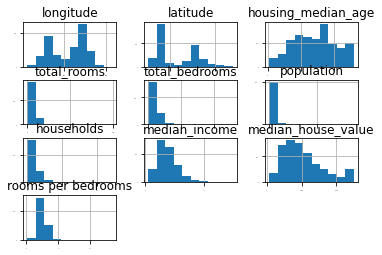

In [24]:
data.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1)
plt.show()

# Density plot

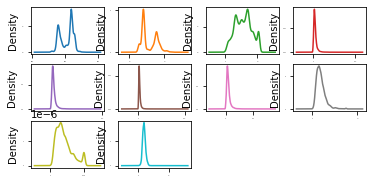

In [25]:
data.plot(kind='density' ,subplots=True,layout=(4,4),sharex=False,legend=False,fontsize=1)
plt.show()

# Boxplots

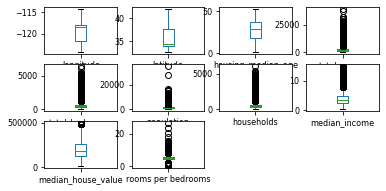

In [26]:
data.plot(kind='box' ,subplots=True,layout=(4,4),sharex=False,legend=False,fontsize=8)
plt.show()

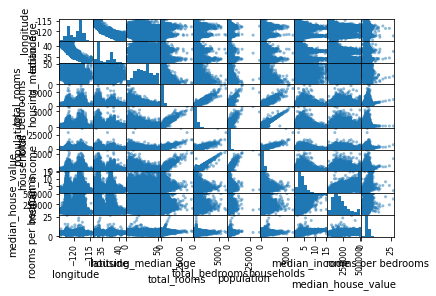

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

# Heatmap 

<AxesSubplot:>

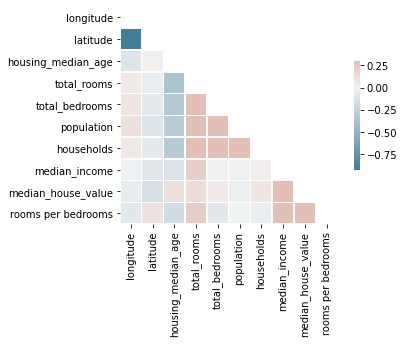

In [28]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Multiple Regression 

In [29]:
#from sklearn import linear_model
#regr = linear_model.LinearRegression()
#regr.fit(x_train, y_train)
#print ('Coefficients: ', regr.coef_)

In [30]:
#y_pred = sc_y.inverse_transform(regr.predict(sc_x.transform(x_test)))
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#print("Residual sum of squares: %.2f"
#      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(x_test, y_test))

# Random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 90, random_state = 0)
regressor.fit(x_train, y_train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=90, random_state=0)

In [32]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[145238.89 136900.  ]
 [249584.44 241300.  ]
 [137070.   200700.  ]
 ...
 [145367.78 128600.  ]
 [222495.56 259500.  ]
 [186118.89 167600.  ]]


# Evaluation

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8217569194248769